# PCA 

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
from sklearn import decomposition

In [4]:
pca=decomposition.PCA()

In [5]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
iris_pca=pca.fit_transform(X)

In [7]:
iris_pca[1:2]

array([[-2.71414169, -0.17700123, -0.21046427, -0.09902655]])

In [8]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [9]:
pca.explained_variance_ratio_
#permet de voir quelles sont les variances les plus importantes ; ici, si on veut plus de 95% de significativité, on prend les deux premières variables
#c'est à dire longueur et largeur d'un sépal

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [10]:
pca=decomposition.PCA(n_components=2)

In [11]:
Xprime=pca.fit_transform(X)

In [12]:
Xprime.shape
#on voit que seules deux composantes ont été retenues comme il est indiqué avec n_components=2 

(150, 2)

In [13]:
pca.explained_variance_ratio_.sum()

0.977685206318795

Text(0.5, 1.0, 'Après PCA')

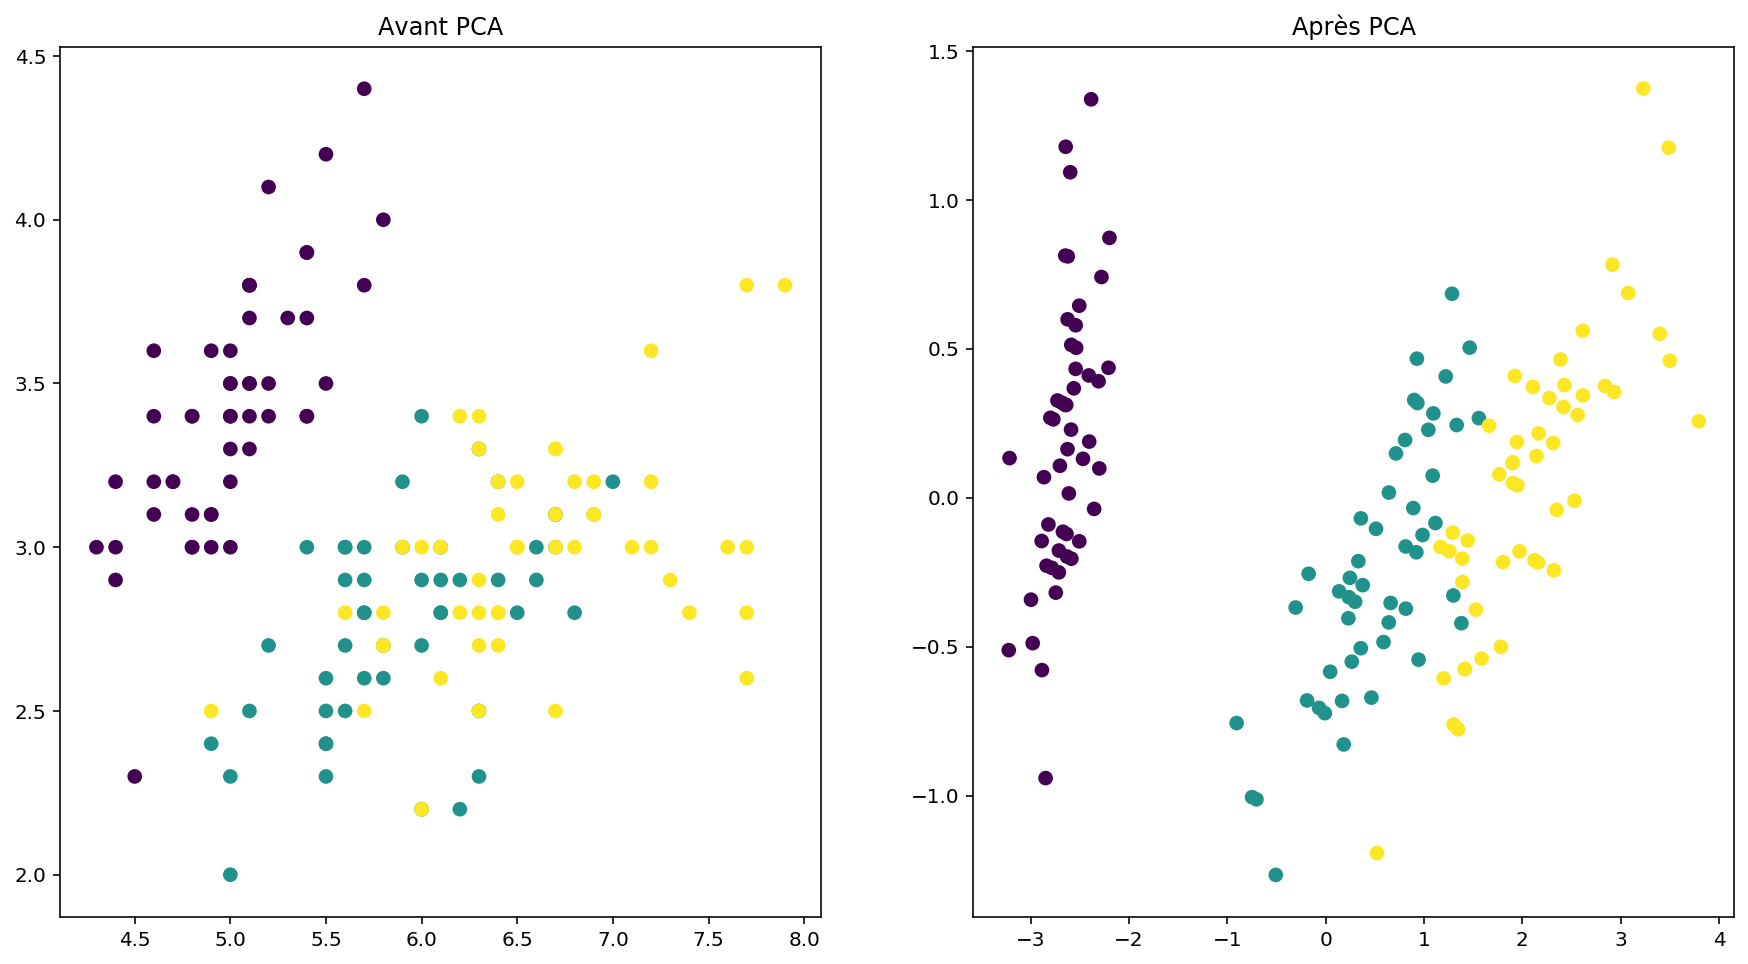

In [14]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(121)
ax.scatter(X[:,0],X[:,1],c=y,s=40)
ax.set_title('Avant PCA')


ax2=fig.add_subplot(122)
ax2.scatter(Xprime[:,0],Xprime[:,1],c=y,s=40)
ax2.set_title('Après PCA')


In [15]:
pca=decomposition.PCA(n_components=0.95)  #on peut aussi souhaiter une somme de variance supérieure ici à 0.95

In [16]:
X2=pca.fit_transform(X)

In [17]:
X2.shape   #on voit qu'avec 0.95 on a 2 composantes principales, avec 0.98 on en a 3

(150, 2)

In [18]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [19]:
##pour aller plus loin
from sklearn import preprocessing


In [20]:
Xscaled=preprocessing.scale(X)

In [21]:
pca=decomposition.PCA(n_components=2)

In [22]:
X3=pca.fit_transform(Xscaled)

Text(0.5, 1.0, 'Après mise à l échelle et PCA')

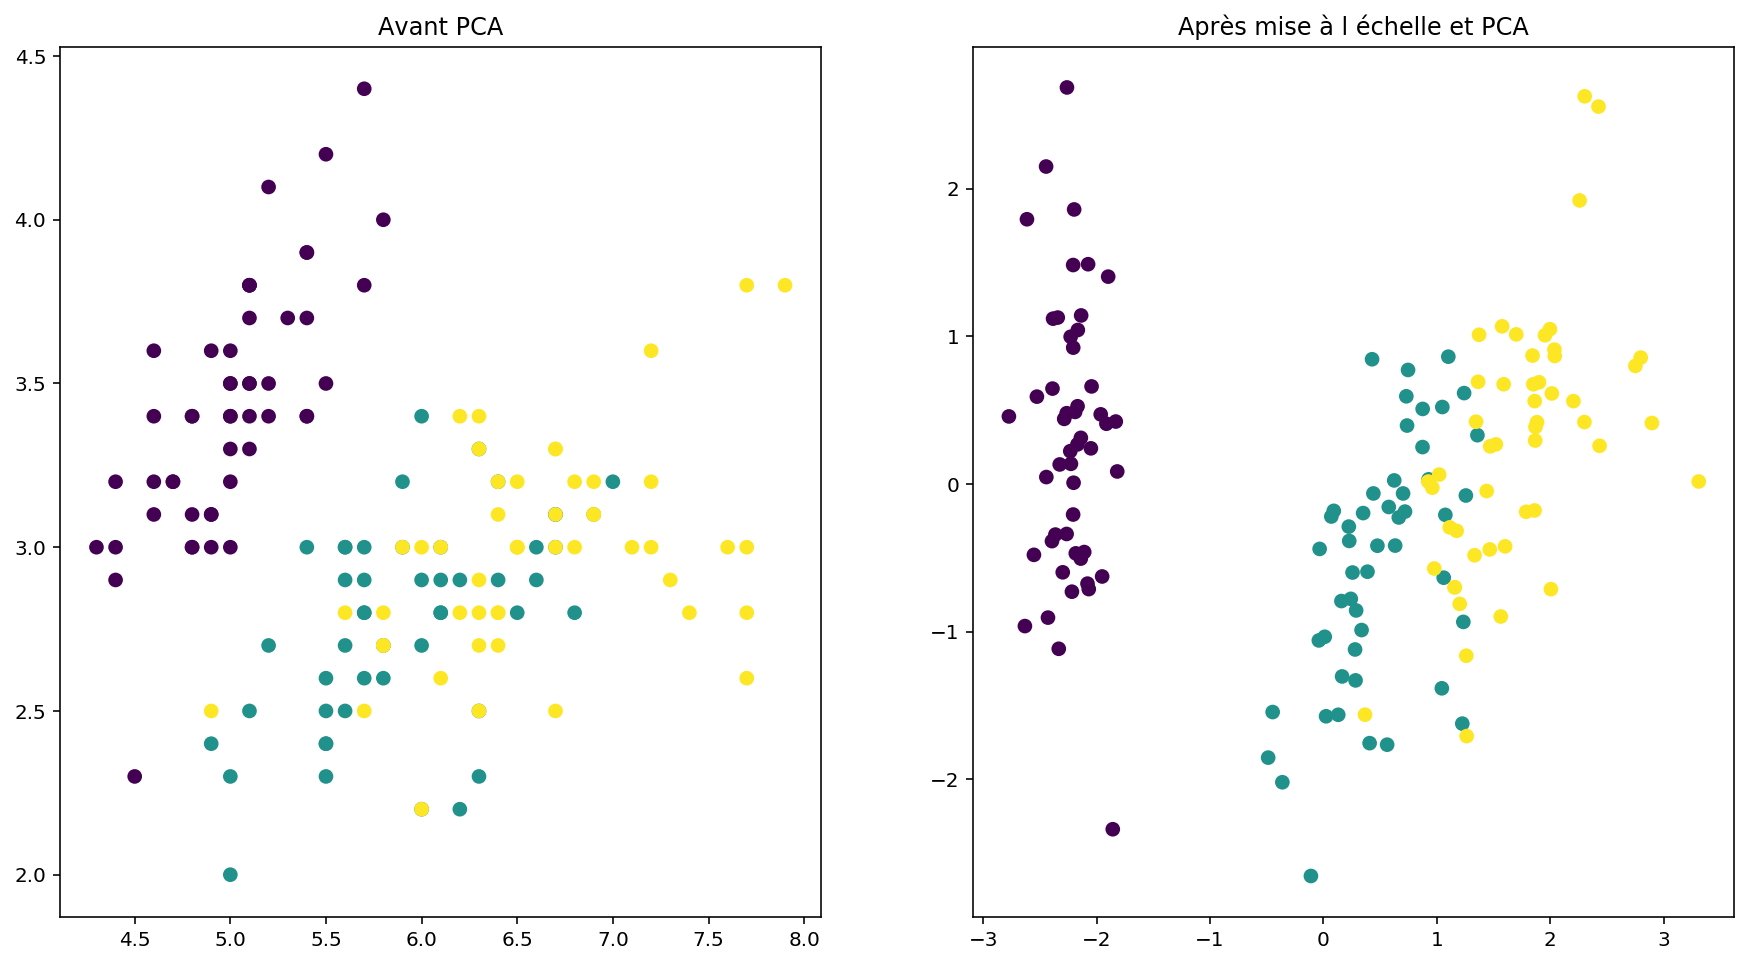

In [23]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(121)
ax.scatter(X[:,0],X[:,1],c=y,s=40)
ax.set_title('Avant PCA')


ax3=fig.add_subplot(122)
ax3.scatter(X3[:,0],X3[:,1],c=y,s=40)
ax3.set_title('Après mise à l échelle et PCA')


In [24]:
kpca=decomposition.KernelPCA(kernel='cosine',n_components=2)  #on peut changer le noyau de calcul, ici cosinus, permet de réduire les angles entre les points

In [25]:
X4=kpca.fit_transform(X)

In [26]:
X4[:5]

array([[ 0.30163722,  0.00071565],
       [ 0.27092065,  0.04235377],
       [ 0.29767949,  0.00240655],
       [ 0.26266611,  0.00266704],
       [ 0.30746945, -0.01871929]])

Text(0.5, 1.0, 'Avec kernel cosinus et PCA')

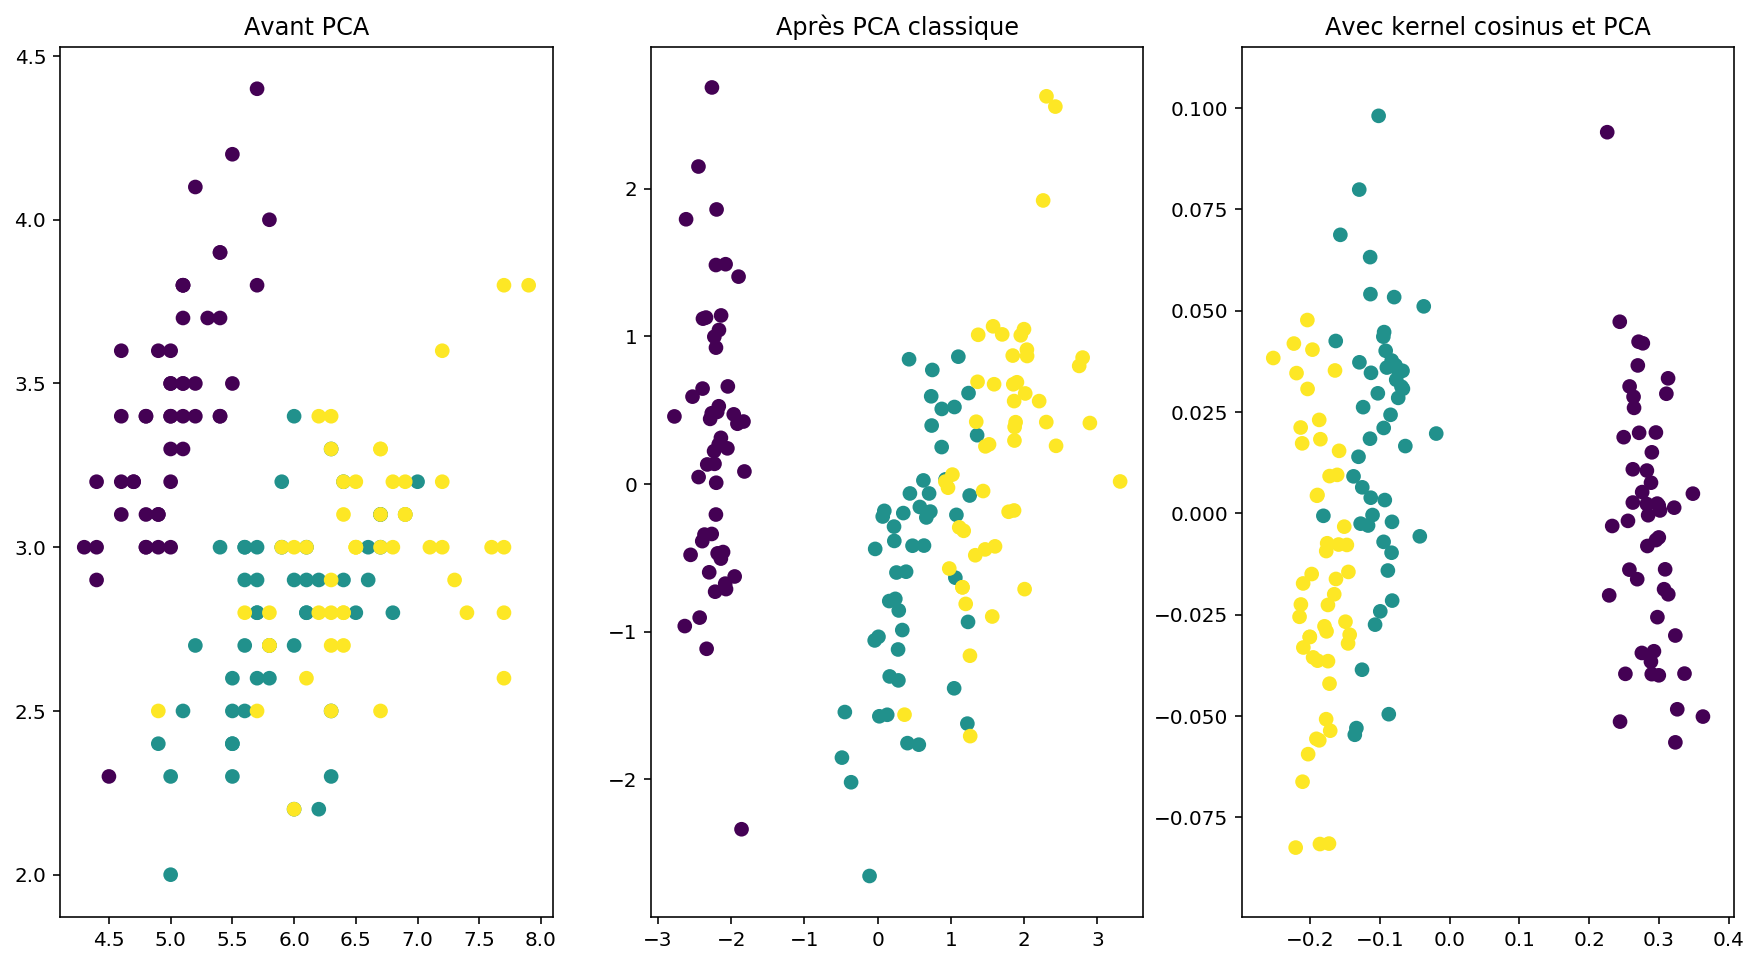

In [27]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(131)
ax.scatter(X[:,0],X[:,1],c=y,s=40)
ax.set_title('Avant PCA')

ax1=fig.add_subplot(132)
ax1.scatter(X3[:,0],X3[:,1],c=y,s=40)
ax1.set_title('Après PCA classique')

ax4=fig.add_subplot(133)
ax4.scatter(X4[:,0],X4[:,1],c=y,s=40)
ax4.set_title('Avec kernel cosinus et PCA')



In [28]:
kpca=decomposition.KernelPCA(kernel='poly',n_components=2)  #on peut changer le noyau de calcul, ici polynomial

In [29]:
X5=kpca.fit_transform(X)

Text(0.5, 1.0, 'Avec kernel polynomial et PCA')

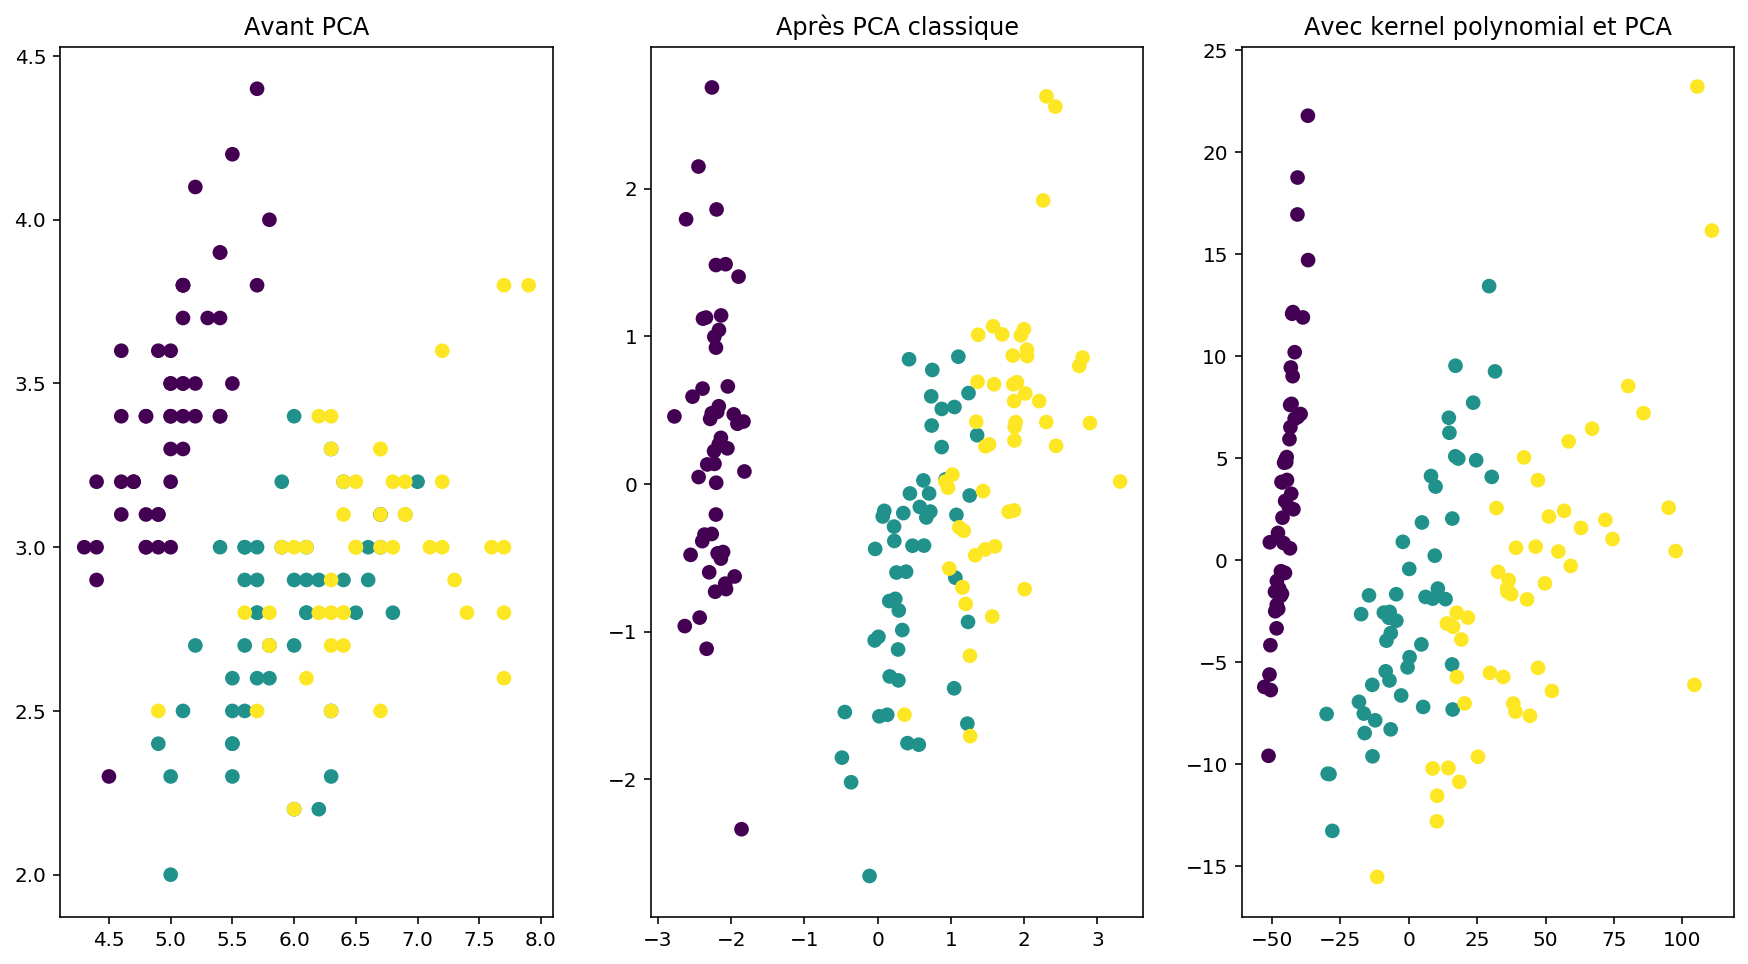

In [30]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(131)
ax.scatter(X[:,0],X[:,1],c=y,s=40)
ax.set_title('Avant PCA')

ax1=fig.add_subplot(132)
ax1.scatter(X3[:,0],X3[:,1],c=y,s=40)
ax1.set_title('Après PCA classique')

ax4=fig.add_subplot(133)
ax4.scatter(X5[:,0],X5[:,1],c=y,s=40)
ax4.set_title('Avec kernel polynomial et PCA')


In [31]:
kpca=decomposition.KernelPCA(kernel='rbf',n_components=2)  #on peut changer le noyau de calcul, ici rbf càd Noyau Radial Gaussien un classique

In [32]:
Xrbf=kpca.fit_transform(X)

Text(0.5, 1.0, 'Avec kernel RBF et PCA')

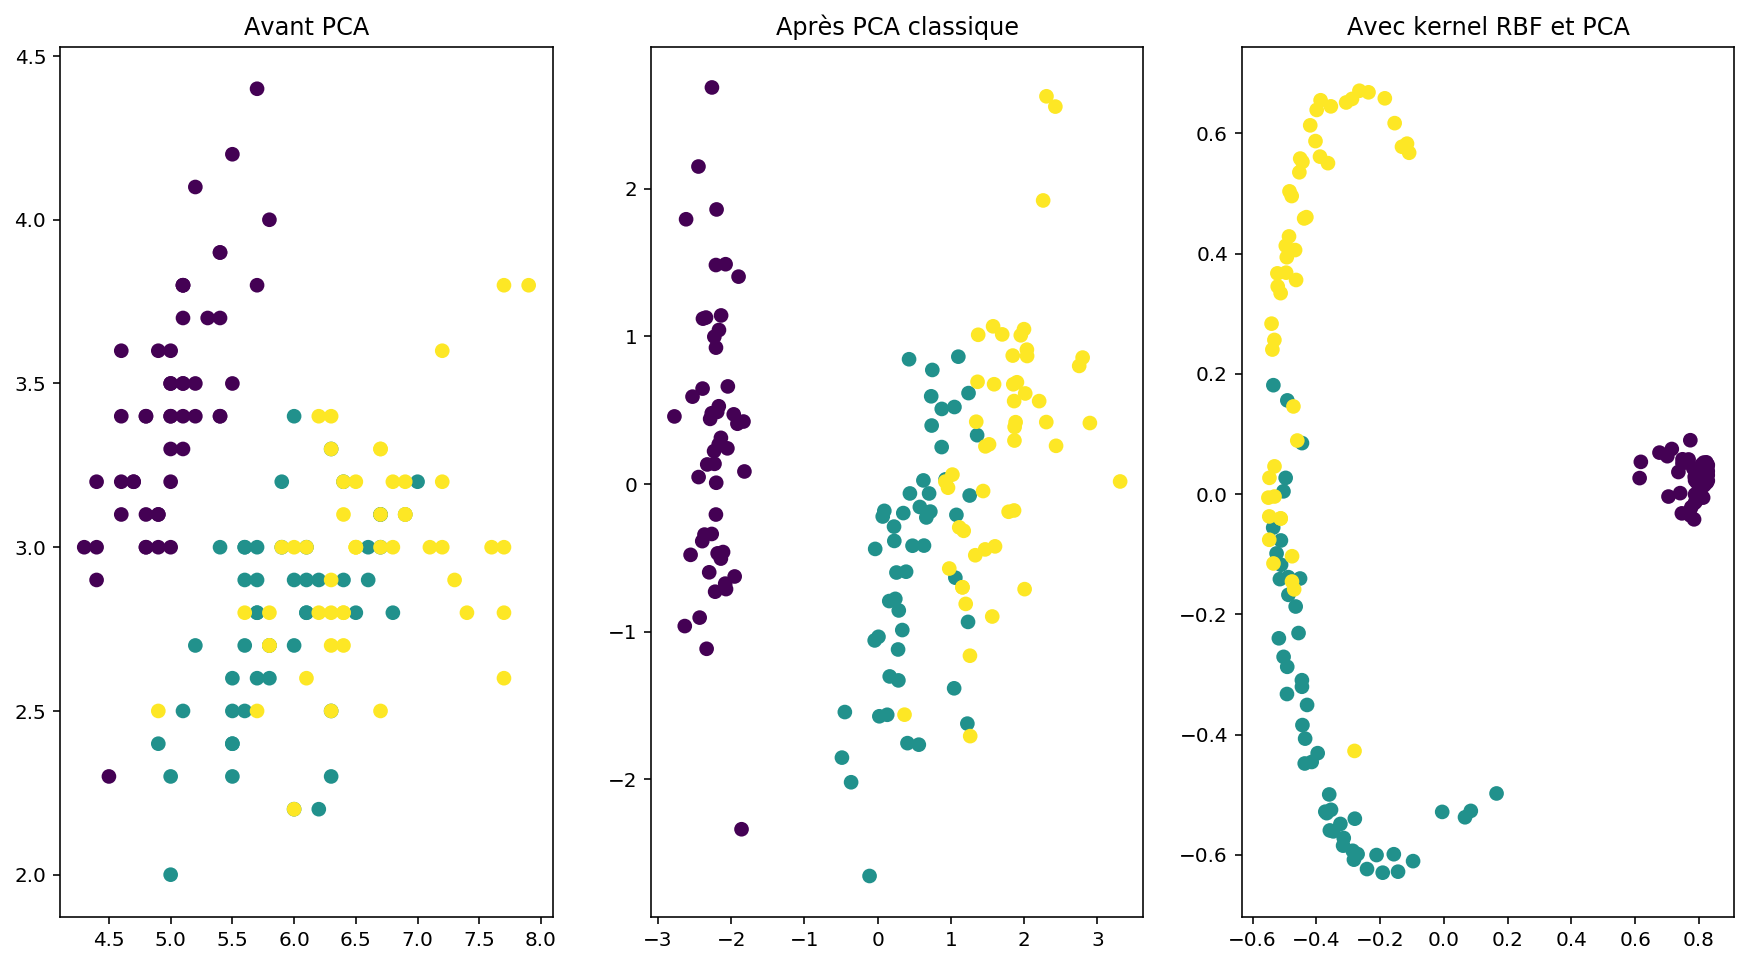

In [33]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(131)
ax.scatter(X[:,0],X[:,1],c=y,s=40)
ax.set_title('Avant PCA')

ax1=fig.add_subplot(132)
ax1.scatter(X3[:,0],X3[:,1],c=y,s=40)
ax1.set_title('Après PCA classique')

ax4=fig.add_subplot(133)
ax4.scatter(Xrbf[:,0],Xrbf[:,1],c=y,s=40)
ax4.set_title('Avec kernel RBF et PCA')


In [45]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap


#d'autres décomposition 
#TSNE = t-Distributed Stochastic Neighbor Embedding effectue une réduction de dimension en essayant de conserver les obs semblabes proches
#et les dissemblables éloignées
#MDS = multidimensional scaling : réduit la dimension en s'efforçant de préserver les distances entre les observations
#Isompa = crée un graphe en connectant chaque observation à ses plus proches voisins puis effectue une réduction de dimension en s'efforçant de 
#préserver les distances géodésiques entre les observations.

#Load visualization library
import matplotlib.pyplot as plt
%matplotlib inline

iris_pca = PCA(n_components = 2).fit_transform(X)
iris_tsne = TSNE(learning_rate=200).fit_transform(X)

iris_MDS = MDS(n_components = 2).fit_transform(X)
iris_ISO = Isomap(n_components = 2).fit_transform(X)

#plusieurs type de décomposition pour réduire les variables

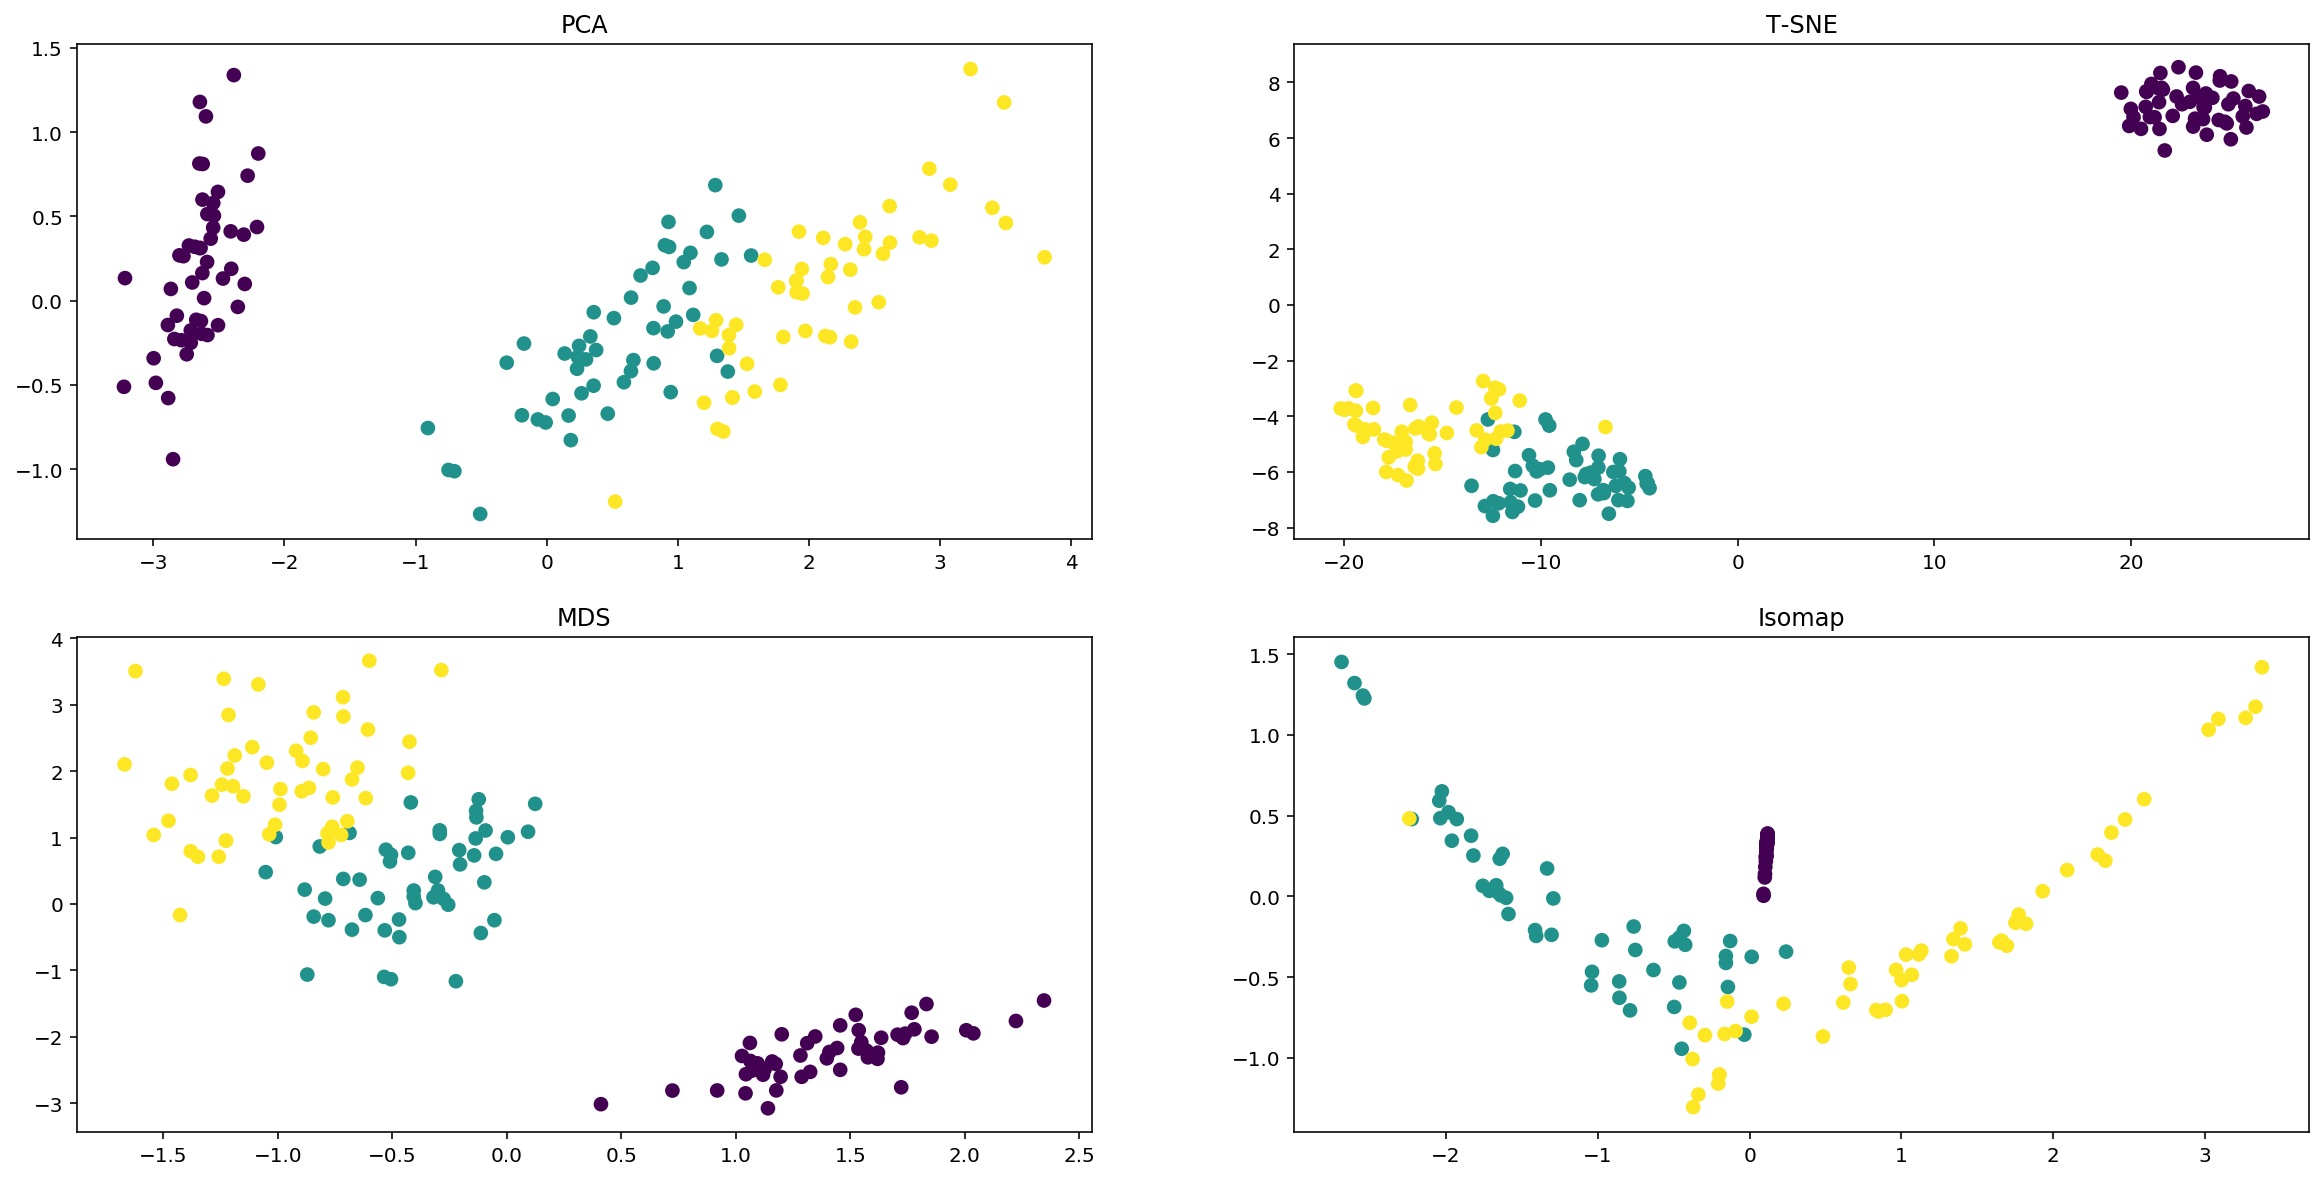

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('PCA')
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=y,s=40)

plt.subplot(222)
plt.title('T-SNE')
plt.scatter(iris_tsne[:,0],iris_tsne[:,1],c=y,s=40)

plt.subplot(223)
plt.title('MDS')
plt.scatter(iris_MDS[:,0],iris_MDS[:,1],c=y,s=40)

plt.subplot(224)
plt.title('Isomap')
plt.scatter(iris_ISO[:,0],iris_ISO[:,1],c=y,s=40)







Text(0.5, 1.0, 'PCA suivi par TSNE')

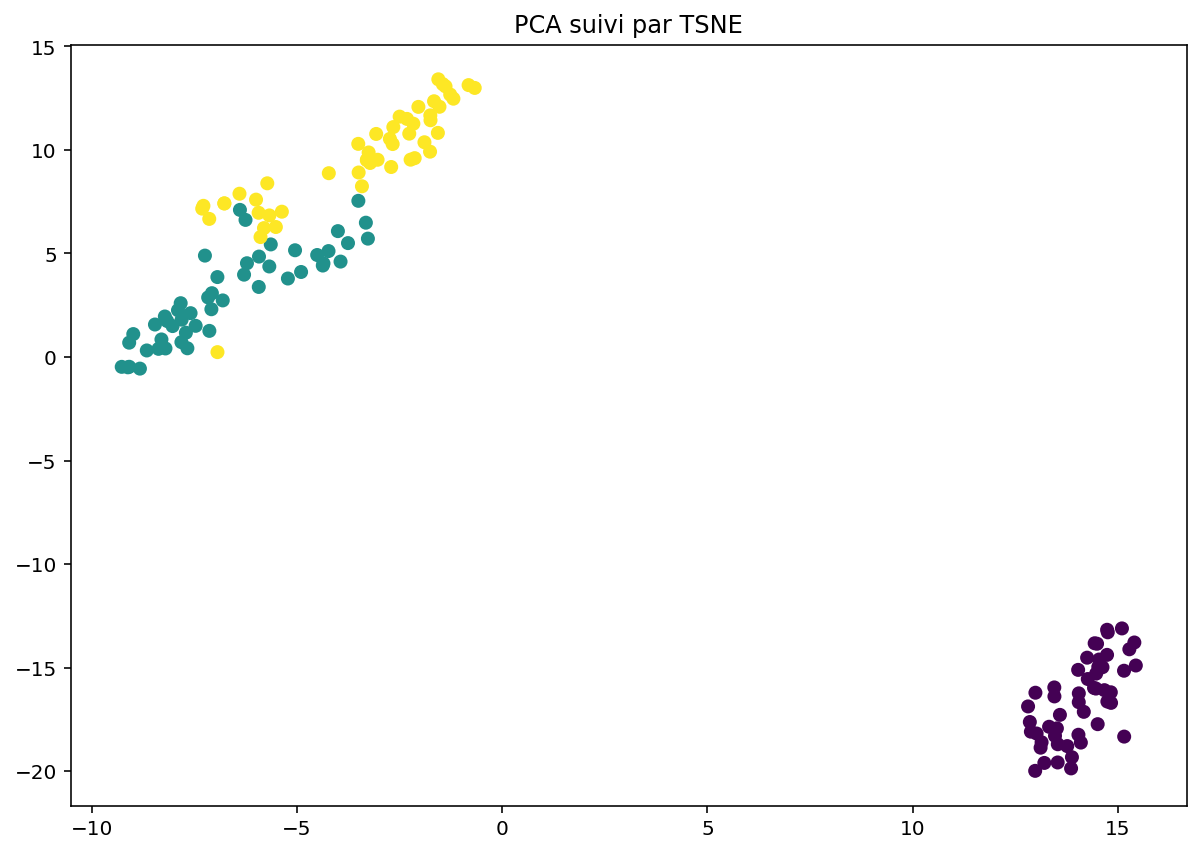

In [47]:
iris_pca_then_tsne = TSNE(learning_rate=200).fit_transform(iris_pca)
plt.figure(figsize=(10, 7))
plt.scatter(iris_pca_then_tsne[:, 0], iris_pca_then_tsne[:, 1], c=y)
plt.title("PCA suivi par TSNE")

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Linear Discriminant Analysis détermine l'entrainement des axes les plus discriminant entre les classes puis projection sur l'hyperplan ainsi déterminé

In [49]:
iris_lda=LinearDiscriminantAnalysis().fit_transform(X,y)

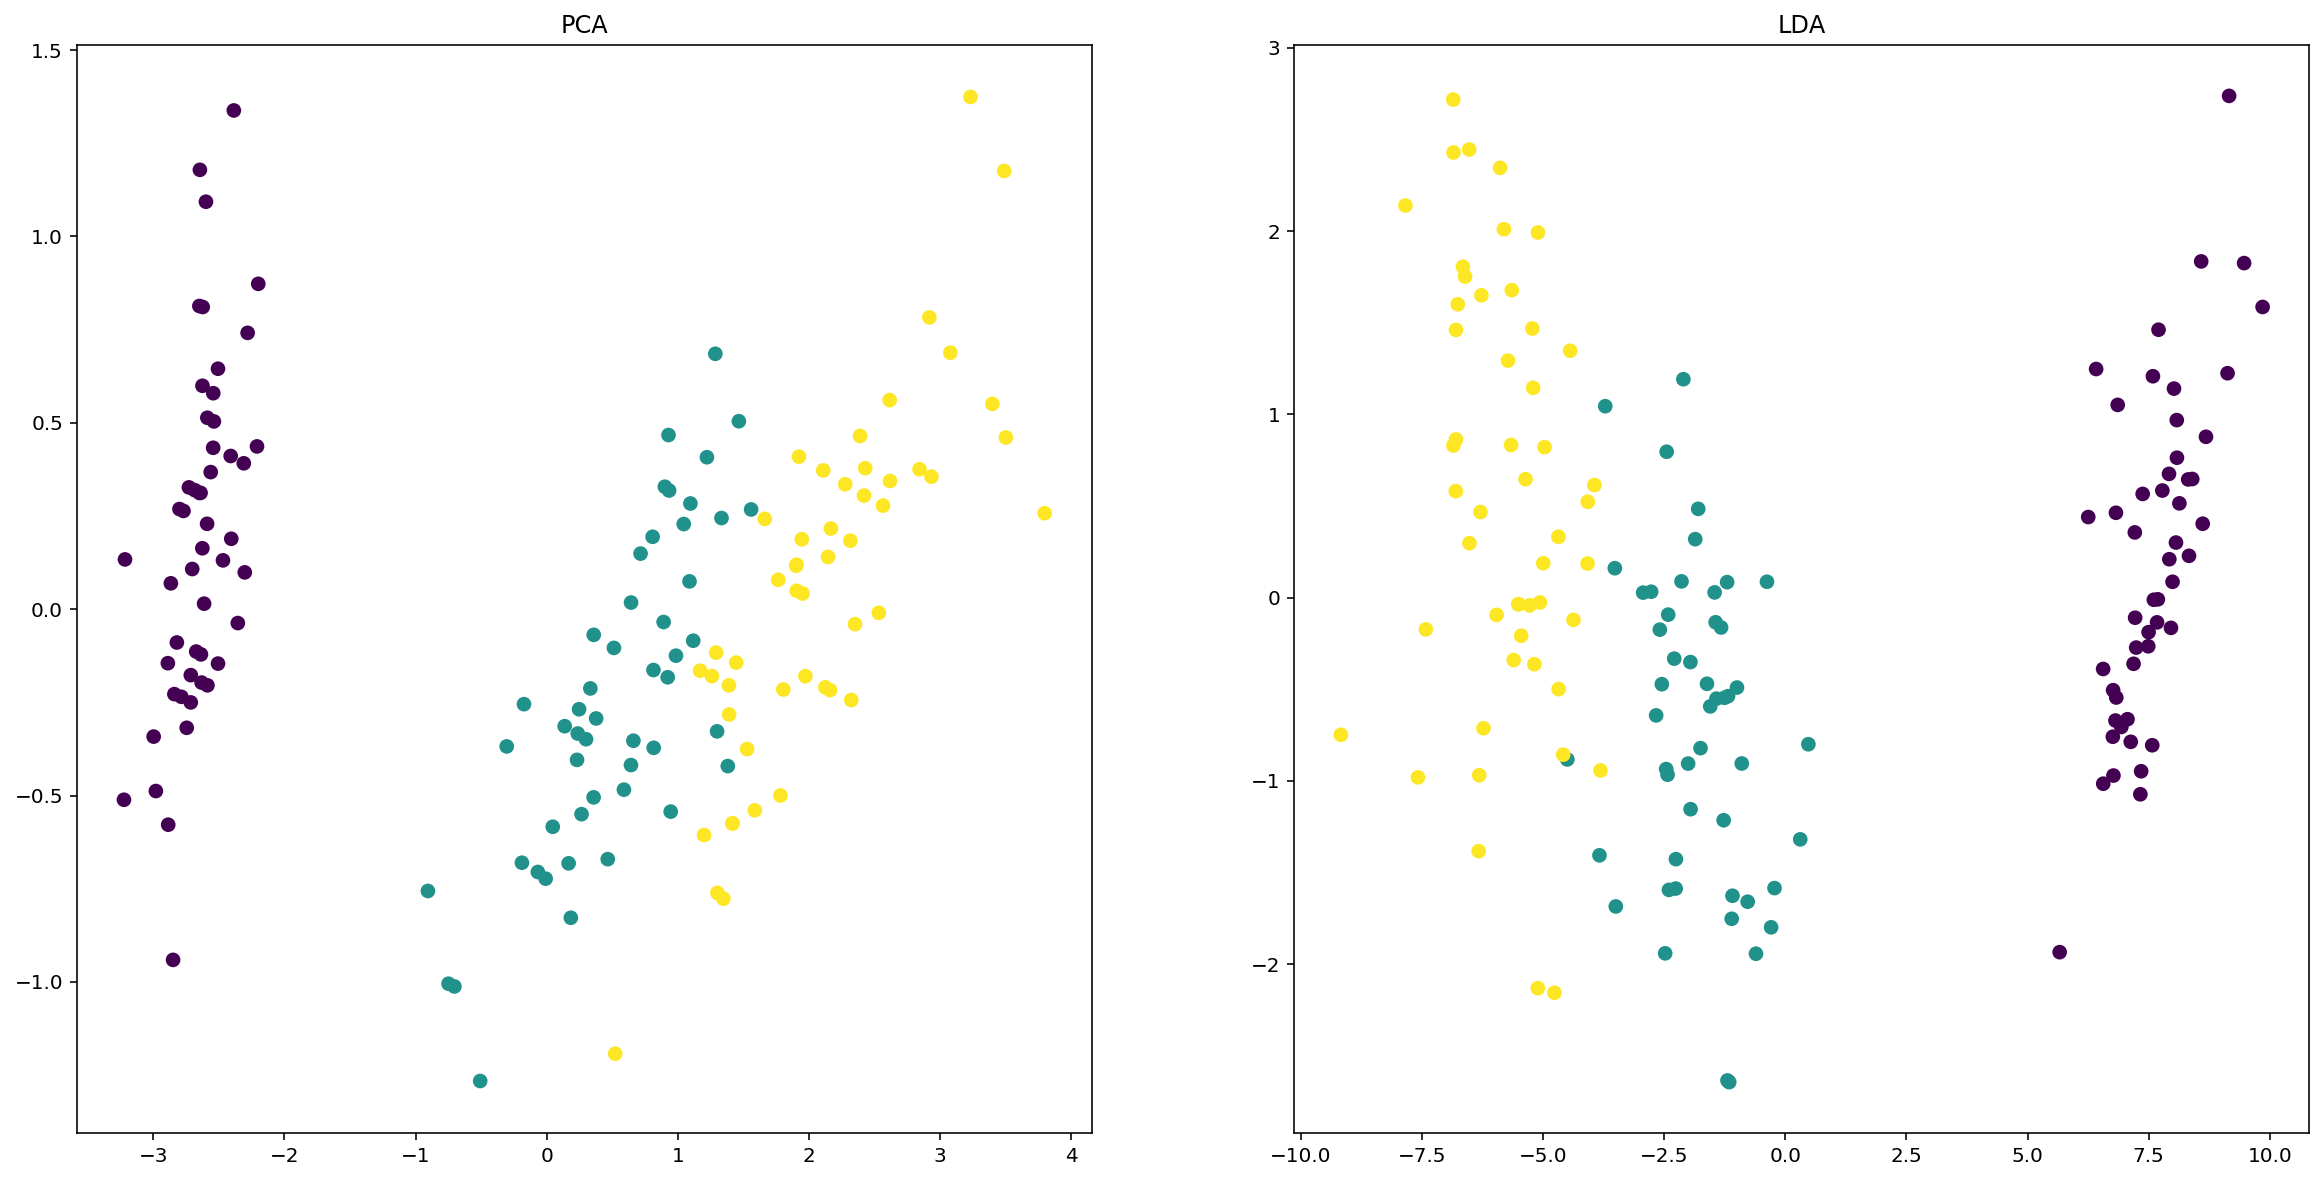

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('PCA')
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=y,s=40)

plt.subplot(122)
plt.title('LDA')
plt.scatter(iris_lda[:,0],iris_lda[:,1],c=y,s=40)
